In [ ]:

import rasterio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

In [ ]:
# Define directories
pluvial_dir = "Pluvial_def_1in100"
fluvial_dir = "Fluvial_def_1in100"

# Define file names
file_names = ["n29w098.tif", "n29w099.tif", "n30w098.tif", "n30w099.tif"]

# Generate file paths
tif_files_pluvial = [os.path.join(pluvial_dir, file) for file in file_names]
tif_files_fluvial = [os.path.join(fluvial_dir, file) for file in file_names]




# Plotting raw pluvial and fluvial tif files 

<ipython-input-9-904c22bc1442>:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar


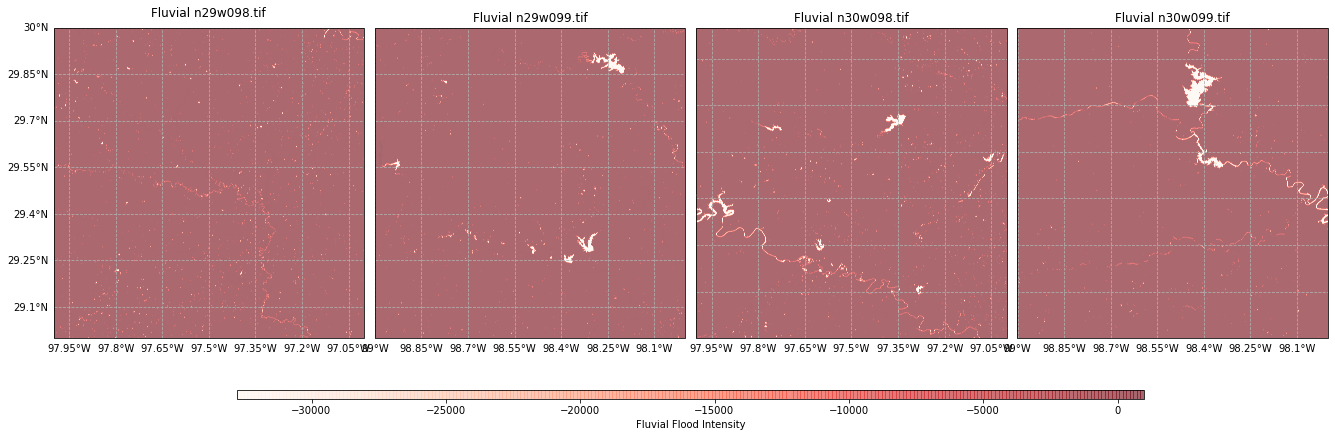

In [9]:
# Plot only fluvial files
def plot_tif_on_map(tif_path, ax, title, cmap, show_grid=False, show_longitude=True):
    with rasterio.open(tif_path) as dataset:
        img = dataset.read(1)  # Read first band
        bounds = dataset.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
        
        # Masking no-data values
        img = np.ma.masked_equal(img, dataset.nodata)
        
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='gray')
        
        gl = ax.gridlines(draw_labels=show_grid or show_longitude, linestyle="--")
        gl.right_labels = False
        gl.top_labels = False
        if not show_grid:
            gl.left_labels = False
            gl.bottom_labels = show_longitude
        
        img_plot = ax.imshow(img, extent=extent, transform=ccrs.PlateCarree(), cmap=cmap, alpha=0.6)
        ax.set_title(title)
        return img_plot

# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.ravel()

img_plots_fluvial = []

# Plot fluvial images
for i, tif_file in enumerate(tif_files_fluvial):
    title = f"Fluvial {file_names[i]}"
    show_grid = (i == 0)  # Show lat/lon grid only for the first image
    img_plot = plot_tif_on_map(tif_file, axes[i], title, 'Reds', show_grid)
    img_plots_fluvial.append(img_plot)

# Create colorbar for fluvial images
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Fluvial colorbar position
cbar = fig.colorbar(img_plots_fluvial[-1], cax=cbar_ax, orientation='horizontal')
cbar.set_label("Fluvial Flood Intensity")

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar
plt.show()


<ipython-input-8-989f9ef1203c>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar


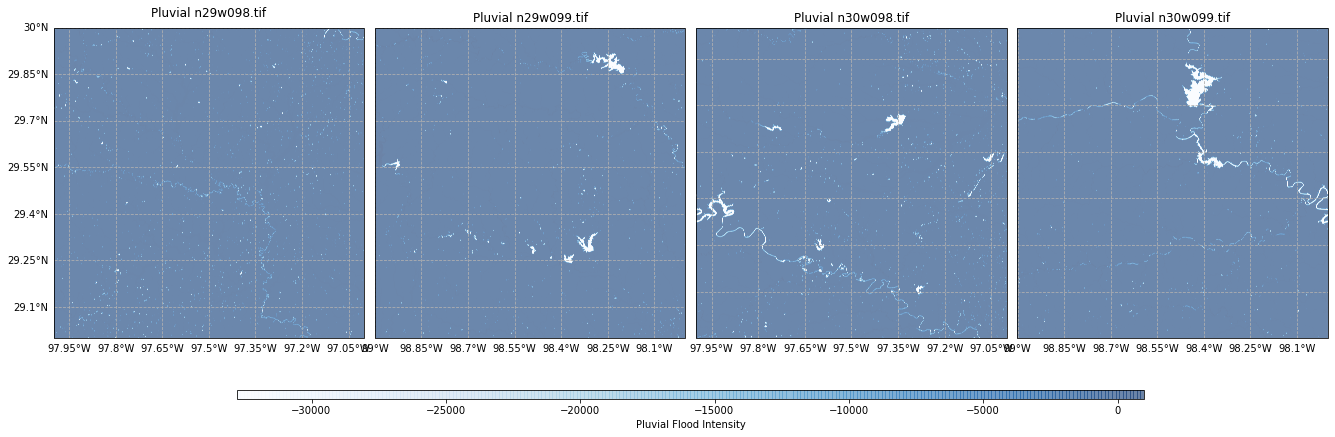

In [8]:
# Plot only Pluvial files

def plot_tif_on_map(tif_path, ax, title, cmap, show_grid=False, show_longitude=True):
    with rasterio.open(tif_path) as dataset:
        img = dataset.read(1)  # Read first band
        bounds = dataset.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
        
        # Masking no-data values
        img = np.ma.masked_equal(img, dataset.nodata)
        
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='gray')
        
        gl = ax.gridlines(draw_labels=show_grid or show_longitude, linestyle="--")
        gl.right_labels = False
        gl.top_labels = False
        if not show_grid:
            gl.left_labels = False
            gl.bottom_labels = show_longitude
        
        img_plot = ax.imshow(img, extent=extent, transform=ccrs.PlateCarree(), cmap=cmap, alpha=0.6)
        ax.set_title(title)
        return img_plot

# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.ravel()

img_plots_pluvial = []

# Plot pluvial images
for i, tif_file in enumerate(tif_files_pluvial):
    title = f"Pluvial {file_names[i]}"
    show_grid = (i == 0)  # Show lat/lon grid only for the first image
    img_plot = plot_tif_on_map(tif_file, axes[i], title, 'Blues', show_grid, show_longitude=True)
    img_plots_pluvial.append(img_plot)

# Create colorbar for pluvial images
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Pluvial colorbar position
cbar = fig.colorbar(img_plots_pluvial[-1], cax=cbar_ax, orientation='horizontal')
cbar.set_label("Pluvial Flood Intensity")

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar
plt.show()


# Creating Filterd tif files for values above 15 cm

In [11]:
# Function to filter values above 15 cm and save new files
def filter_and_save_tif(input_files, output_dir, threshold=15):
    os.makedirs(output_dir, exist_ok=True)
    for file in input_files:
        with rasterio.open(file) as dataset:
            img = dataset.read(1)
            meta = dataset.meta
            # Ensure no-data values are correctly set
            nodata_value = dataset.nodata
            if nodata_value is None:
                nodata_value = -9999  # Assign a placeholder for no-data if not set
            img[img < threshold] = nodata_value  # Mask values below threshold
            
            output_path = os.path.join(output_dir, os.path.basename(file))
            with rasterio.open(output_path, 'w', **meta) as dst:
                dst.write(img, 1)

In [12]:

# Apply filtering to pluvial and fluvial data
filtered_pluvial_dir = "Filtered_Pluvial"
filtered_fluvial_dir = "Filtered_Fluvial"
filter_and_save_tif(tif_files_pluvial, filtered_pluvial_dir)
filter_and_save_tif(tif_files_fluvial, filtered_fluvial_dir)

def plot_tif_on_map(tif_path, ax, title, cmap, show_grid=False, show_longitude=True):
    with rasterio.open(tif_path) as dataset:
        img = dataset.read(1)  # Read first band
        bounds = dataset.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
        
        # Masking no-data values
        img = np.ma.masked_equal(img, dataset.nodata)
        
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='gray')
        
        gl = ax.gridlines(draw_labels=show_grid or show_longitude, linestyle="--")
        gl.right_labels = False
        gl.top_labels = False
        if not show_grid:
            gl.left_labels = False
            gl.bottom_labels = show_longitude
        
        img_plot = ax.imshow(img, extent=extent, transform=ccrs.PlateCarree(), cmap=cmap, alpha=0.6)
        ax.set_title(title)
        return img_plot



<ipython-input-13-9d10eaeaebb9>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar


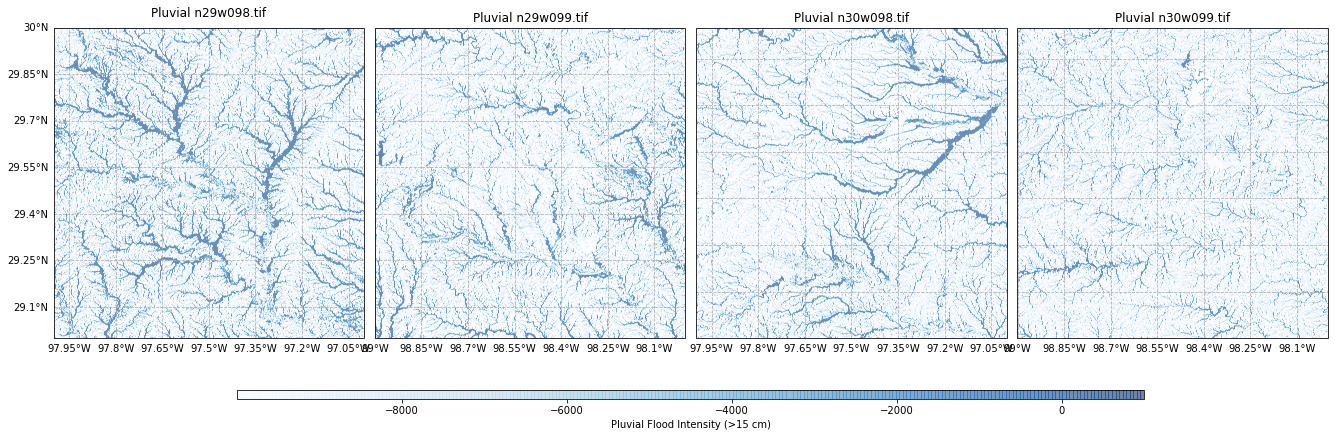

In [13]:
# Create figure and axes for pluvial flooding
fig, axes = plt.subplots(1, 4, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.ravel()
img_plots_pluvial = []

# Plot pluvial images
for i, tif_file in enumerate([os.path.join(filtered_pluvial_dir, f) for f in file_names]):
    title = f"Pluvial {file_names[i]}"
    show_grid = (i == 0)  # Show lat/lon grid only for the first image
    img_plot = plot_tif_on_map(tif_file, axes[i], title, 'Blues', show_grid, show_longitude=True)
    img_plots_pluvial.append(img_plot)

# Create colorbar for pluvial images
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Pluvial colorbar position
cbar = fig.colorbar(img_plots_pluvial[-1], cax=cbar_ax, orientation='horizontal')
cbar.set_label("Pluvial Flood Intensity (>15 cm)")

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar
plt.show()


<ipython-input-16-00aa8c45bc0e>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar


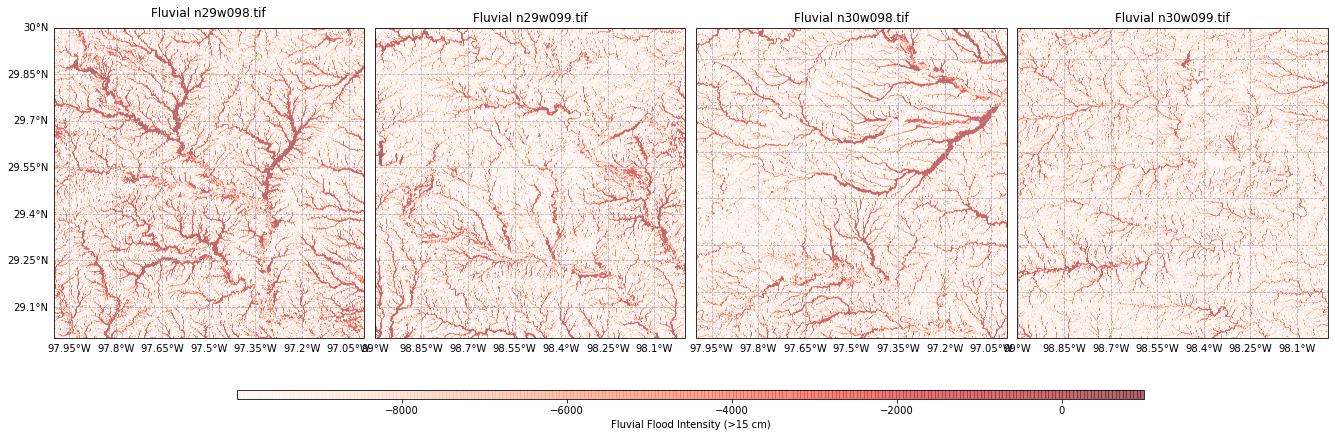

In [16]:
# Create figure and axes for pluvial flooding
fig, axes = plt.subplots(1, 4, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.ravel()
img_plots_fluvial = []

# Plot pluvial images
for i, tif_file in enumerate([os.path.join(filtered_pluvial_dir, f) for f in file_names]):
    title = f"Fluvial {file_names[i]}"
    show_grid = (i == 0)  # Show lat/lon grid only for the first image
    img_plot = plot_tif_on_map(tif_file, axes[i], title, 'Reds', show_grid, show_longitude=True)
    img_plots_fluvial.append(img_plot)

# Create colorbar for pluvial images
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Pluvial colorbar position
cbar = fig.colorbar(img_plots_fluvial[-1], cax=cbar_ax, orientation='horizontal')
cbar.set_label("Fluvial Flood Intensity (>15 cm)")

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar
plt.show()